In [1]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


Using TensorFlow backend.


60000 (28, 28)
60000 5


In [2]:
from keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

In [3]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=60, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


In [7]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 21us/step - loss: 1.2347 - accuracy: 0.6887 - val_loss: 0.7379 - val_accuracy: 0.8623
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.6797 - accuracy: 0.8470 - val_loss: 0.5140 - val_accuracy: 0.8968
Epoch 3/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.5369 - accuracy: 0.8728 - val_loss: 0.4191 - val_accuracy: 0.9107
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.4642 - accuracy: 0.8866 - val_loss: 0.3694 - val_accuracy: 0.9192
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.4178 - accuracy: 0.8964 - val_loss: 0.3452 - val_accuracy: 0.9177
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3889 - accuracy: 0.9010 - val_loss: 0.3189 - val_accuracy: 0.9238
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

10000/10000 [==============================] - 0s 37us/step


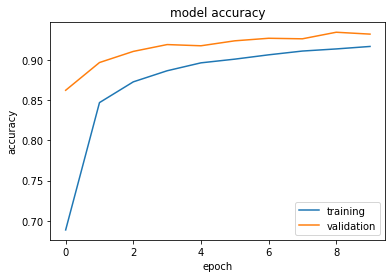

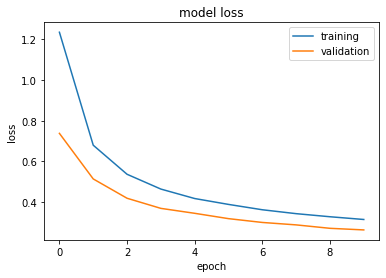

Test loss: 0.304
Test accuracy: 0.92


In [8]:
loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

* How many total trainable parameters does this model have? 300520
  * How many weights? 60 * 784 + 60 * 10 = 47640
  * How many biases? 60 
* How accurate was this model on the validation data after 10 epochs? 93%
  * How different was the model's performance on the training data? Difference of 2%
  * How different was the model's performance on the test data? - Test data was 94.2% so difference of -1% 
* About how long did each epoch take? 1s


In [9]:
60 * 784 + 60 * 10

47640